In [58]:
pip install geoplot

  Using cached geoplot-0.5.0-py3-none-any.whl (28 kB)
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
        warnings.warn(
      Proj 8.0.0 must be installed.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
Note: you may need to restart the kernel to use updated packages.


In [59]:
conda install -c conda-forge geoplot

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 

path = '/Users/meera/Documents/drugs/Data/od_deaths_merged_v2.csv'

overall_data = pd.read_csv(path)

overall_data.columns

path2 = '/Users/meera/Documents/drugs/Data/2021_Gaz_counties_national.txt'

county_codes = pd.read_csv(path2, sep = "\t", header = 1, 
                           names=['USPS', 'County Code', 'ANSICODE', 'NAME', 'ALAND', 
                                                     'AWATER', 'ALAND_SQMI',
       'AWATER_SQMI', 'Latitude',
       'Longitude'])

# county_codes.columns[9] =  'Longitude'

#county_codes.columns[9]
county_codes = county_codes[['County Code', 'Latitude', "Longitude"]]
county_codes

#county_codes.columns = ['County Code', 'Latitude', "Longitude"]

#print(overall_data.head())
#county_codes.head()
#print(overall_data.columns)
#county_codes.dtypes


,County Code,Latitude,Longitude
0,1003,30.659218,-87.746067
1,1005,31.870253,-85.405104
2,1007,33.015893,-87.127148
3,1009,33.977358,-86.566440
4,1011,32.101759,-85.717261
...,...,...,...
3215,72145,18.455128,-66.397883
3216,72147,18.125418,-65.432474
3217,72149,18.130718,-66.472244
3218,72151,18.059858,-65.859871


In [2]:
#Now we merge the two datafiles together 
#Merge the new df with County Code and GEOID 
#only pull INTPTLONG and INTPTLAT 

big_boy = overall_data.merge(county_codes, on = ['County Code'], how = 'left')
big_boy

,Year,State_x,State Abv,State Code,County_x,County Code,Deaths,Population,Crude Rate,Cruder Rate,...,Urbanicity,Jail Population,Incarceration Rate per 100k,StateFIPS,CountyFIPS,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude
0,1999.0,Alabama,AL,1.0,"Baldwin County, AL",1003,11.0,137555.0,Unreliable,7.996801,...,small/mid,390.000000,440.340000,1,3,14668.0,10.5,39194.0,30.659218,-87.746067
1,1999.0,Alabama,AL,1.0,"Jefferson County, AL",1073,34.0,662845.0,5.13,5.129404,...,urban,1779.000000,408.230000,1,73,89661.0,13.7,35885.0,33.553444,-86.896536
2,1999.0,Alabama,AL,1.0,"Madison County, AL",1089,10.0,274693.0,Unreliable,3.640428,...,small/mid,713.000000,382.130000,1,89,30056.0,11.1,43718.0,34.764238,-86.551080
3,1999.0,Alabama,AL,1.0,"Mobile County, AL",1097,28.0,399323.0,7.01,7.011868,...,small/mid,1223.000000,470.210000,1,97,72372.0,18.3,32396.0,30.684572,-88.196568
4,1999.0,Alaska,AK,2.0,"Anchorage Borough, AK",2020,21.0,259348.0,8.10,8.097228,...,small/mid,NaN,NaN,2,20,18397.0,7.2,52959.0,61.174250,-149.284329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,2020.0,Wisconsin,WI,55.0,"Winnebago County, WI",55139,38.0,171631.0,22.14,22.140522,...,NaN,NaN,NaN,55,139,14219.0,8.7,64653.0,44.085707,-88.668149
15892,2020.0,Wisconsin,WI,55.0,"Wood County, WI",55141,18.0,72560.0,Unreliable,24.807056,...,NaN,NaN,NaN,55,141,6732.0,9.4,54154.0,44.461413,-90.038825
15893,2020.0,Wyoming,WY,56.0,"Laramie County, WY",56021,17.0,100595.0,Unreliable,16.899448,...,NaN,NaN,NaN,56,21,7242.0,7.4,69450.0,41.292830,-104.660395
15894,2020.0,Wyoming,WY,56.0,"Natrona County, WY",56025,16.0,80815.0,Unreliable,19.798305,...,NaN,NaN,NaN,56,25,7420.0,9.4,65901.0,42.977645,-106.768219


In [3]:
#Now we aer going to convert this dataframe to a geopandas dataframe
import geopandas as gps
import matplotlib.pyplot as plt 

gdf = gps.GeoDataFrame(big_boy, geometry=gps.points_from_xy(big_boy.Longitude, big_boy.Latitude))
gdf



,Year,State_x,State Abv,State Code,County_x,County Code,Deaths,Population,Crude Rate,Cruder Rate,...,Jail Population,Incarceration Rate per 100k,StateFIPS,CountyFIPS,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry
0,1999.0,Alabama,AL,1.0,"Baldwin County, AL",1003,11.0,137555.0,Unreliable,7.996801,...,390.000000,440.340000,1,3,14668.0,10.5,39194.0,30.659218,-87.746067,POINT (-87.74607 30.65922)
1,1999.0,Alabama,AL,1.0,"Jefferson County, AL",1073,34.0,662845.0,5.13,5.129404,...,1779.000000,408.230000,1,73,89661.0,13.7,35885.0,33.553444,-86.896536,POINT (-86.89654 33.55344)
2,1999.0,Alabama,AL,1.0,"Madison County, AL",1089,10.0,274693.0,Unreliable,3.640428,...,713.000000,382.130000,1,89,30056.0,11.1,43718.0,34.764238,-86.551080,POINT (-86.55108 34.76424)
3,1999.0,Alabama,AL,1.0,"Mobile County, AL",1097,28.0,399323.0,7.01,7.011868,...,1223.000000,470.210000,1,97,72372.0,18.3,32396.0,30.684572,-88.196568,POINT (-88.19657 30.68457)
4,1999.0,Alaska,AK,2.0,"Anchorage Borough, AK",2020,21.0,259348.0,8.10,8.097228,...,NaN,NaN,2,20,18397.0,7.2,52959.0,61.174250,-149.284329,POINT (-149.28433 61.17425)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15891,2020.0,Wisconsin,WI,55.0,"Winnebago County, WI",55139,38.0,171631.0,22.14,22.140522,...,NaN,NaN,55,139,14219.0,8.7,64653.0,44.085707,-88.668149,POINT (-88.66815 44.08571)
15892,2020.0,Wisconsin,WI,55.0,"Wood County, WI",55141,18.0,72560.0,Unreliable,24.807056,...,NaN,NaN,55,141,6732.0,9.4,54154.0,44.461413,-90.038825,POINT (-90.03883 44.46141)
15893,2020.0,Wyoming,WY,56.0,"Laramie County, WY",56021,17.0,100595.0,Unreliable,16.899448,...,NaN,NaN,56,21,7242.0,7.4,69450.0,41.292830,-104.660395,POINT (-104.66039 41.29283)
15894,2020.0,Wyoming,WY,56.0,"Natrona County, WY",56025,16.0,80815.0,Unreliable,19.798305,...,NaN,NaN,56,25,7420.0,9.4,65901.0,42.977645,-106.768219,POINT (-106.76822 42.97765)


In [54]:
gdf.to_csv('geo_od.csv', index = False)

In [5]:
conda list

# packages in environment at /Users/meera/opt/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
affine                    2.3.0                    pypi_0    pypi
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.05                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        2.1.0            py38hecd8cb5_0  
anaconda-project          0.9.1              pyhd3eb1b0_1  
anyio                     2.2.0            py38hecd8cb5_1  
appdirs                   1.4.4                      py_0  
applaunchservices         0.2.1                      py_0  
appnope                   0.1.2           py38hecd8cb5_1001  
appscript                 1.1.2            py38h9ed2024_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38h9ed2024_1  
asn1crypto                


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));


ModuleNotFoundError: No module named 'geoplot'

NameError: name 'gplt' is not defined

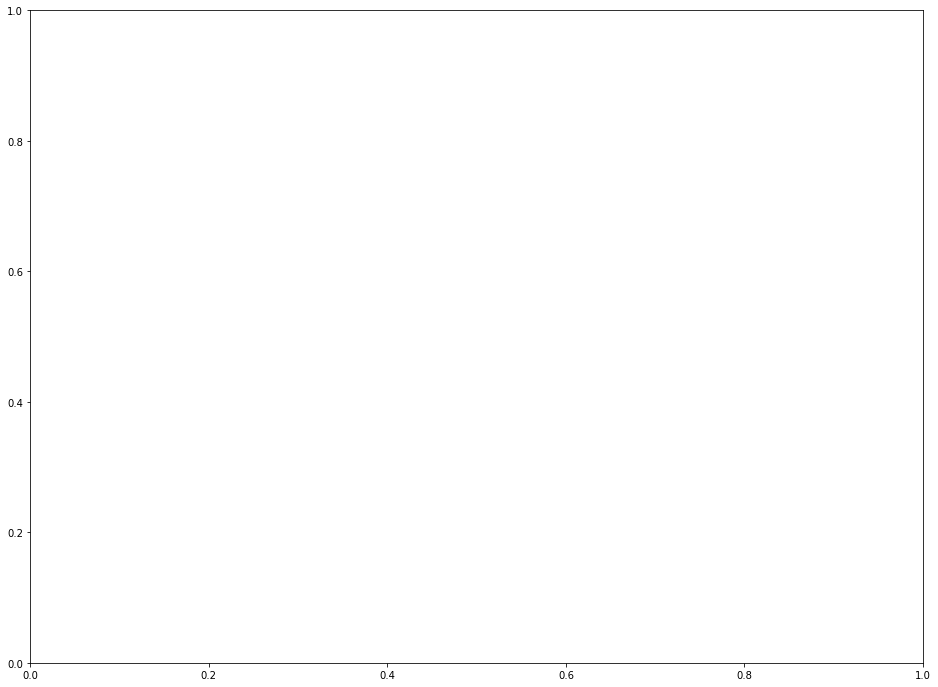

In [48]:
# Initialize the figure
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(gdf['Cruder Rate'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="Cruder Rate", 
    linewidth=.1,
    scheme=scheme, cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Unemployment rate in US counties', fontsize=13);

